In [1]:
from utils import *
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import glob
from joblib import Parallel, delayed

In [2]:
files = glob.glob('sensitivity/*')

In [3]:
dfs = Parallel(n_jobs=-1)(delayed(lambda file: pd.read_csv(file, index_col=False))(file=file) for file in files)
df = pd.concat(dfs)
df['level'] = df['transform'].apply(lambda x: int(x.split(';')[1]))
df['transform_type'] = df['transform'].apply(lambda x: x.split(';')[0])
df = df.sort_values('level').query('transform_type=="Spike"')

In [4]:
df

dataset    method transform  seed  accuracy  level  \
0                  Symbols    rocket   Spike;0     4  0.974874      0   
0         ItalyPowerDemand   catch22   Spike;0     0  0.896016      0   
0           SmoothSubspace  tsforest   Spike;0     4  0.966667      0   
0   SmallKitchenAppliances    rocket   Spike;0     5  0.834667      0   
0                    Plane       cnn   Spike;0     2  0.961905      0   
..                     ...       ...       ...   ...       ...    ...   
0                  Symbols  tsforest  Spike;10     4  0.710553     10   
0             WordSynonyms       cnn  Spike;10     2  0.550157     10   
0                  Symbols  tsforest  Spike;10     2  0.700503     10   
0   SmallKitchenAppliances  tsforest  Spike;10     4  0.509333     10   
0    MixedShapesSmallTrain    rocket  Spike;10     3  0.316289     10   

   transform_type  
0           Spike  
0           Spike  
0           Spike  
0           Spike  
0           Spike  
..            ...  
0           Spike  
0           Spike  
0           Spike  
0           Spike  
0           Spike  

[3695 rows x 7 columns]

<Axes: xlabel='level', ylabel='accuracy'>

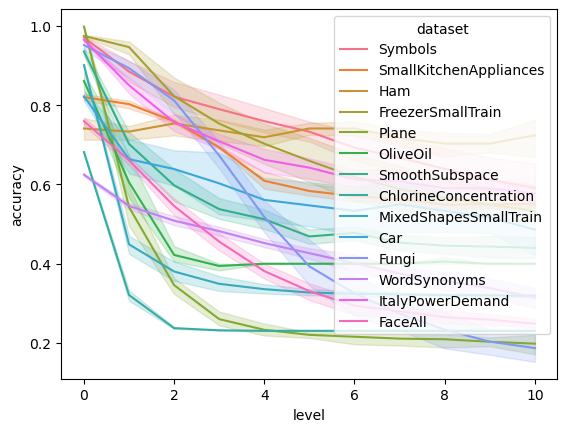

In [5]:
sns.lineplot(data=df.query('method=="rocket"'), x='level', y='accuracy', hue='dataset')

<Axes: xlabel='level', ylabel='accuracy'>

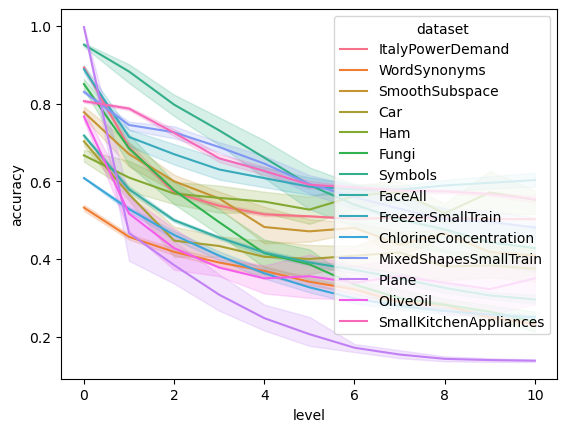

In [6]:
sns.lineplot(data=df.query('method=="catch22"'), x='level', y='accuracy', hue='dataset')

<Axes: xlabel='level', ylabel='accuracy'>

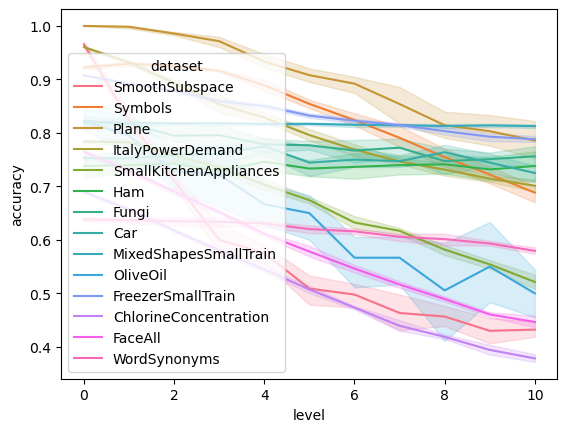

In [7]:
sns.lineplot(data=df.query('method=="tsforest"'), x='level', y='accuracy', hue='dataset')

<Axes: xlabel='level', ylabel='accuracy'>

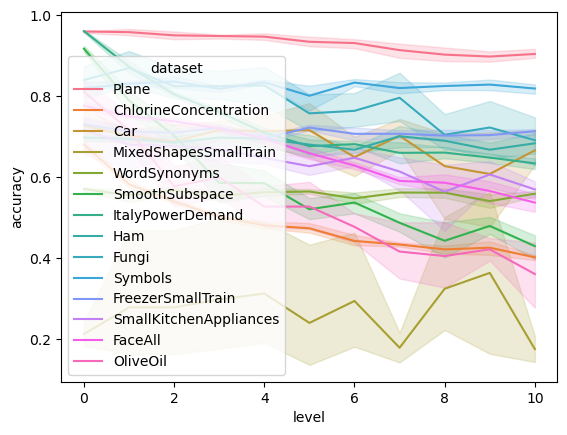

In [8]:
sns.lineplot(data=df.query('method=="cnn"'), x='level', y='accuracy', hue='dataset')

In [9]:
#fhgfgh=dfgdg

In [10]:
df

dataset    method transform  seed  accuracy  level  \
0                  Symbols    rocket   Spike;0     4  0.974874      0   
0         ItalyPowerDemand   catch22   Spike;0     0  0.896016      0   
0           SmoothSubspace  tsforest   Spike;0     4  0.966667      0   
0   SmallKitchenAppliances    rocket   Spike;0     5  0.834667      0   
0                    Plane       cnn   Spike;0     2  0.961905      0   
..                     ...       ...       ...   ...       ...    ...   
0                  Symbols  tsforest  Spike;10     4  0.710553     10   
0             WordSynonyms       cnn  Spike;10     2  0.550157     10   
0                  Symbols  tsforest  Spike;10     2  0.700503     10   
0   SmallKitchenAppliances  tsforest  Spike;10     4  0.509333     10   
0    MixedShapesSmallTrain    rocket  Spike;10     3  0.316289     10   

   transform_type  
0           Spike  
0           Spike  
0           Spike  
0           Spike  
0           Spike  
..            ...  
0           Spike  
0           Spike  
0           Spike  
0           Spike  
0           Spike  

[3695 rows x 7 columns]

In [11]:
def get_ranks(df, reps =30):
    algo_ranks = {x: 0 for x in df.method.unique()}
    for _ in range(reps):
        pdf = df.sample(frac=1).reset_index(drop=True)
        l = pdf.drop_duplicates(subset='method', keep='first').sort_values('accuracy', ascending=False)
        for i, (_, row) in enumerate(l.iterrows()):
            algo_ranks[row['method']] += (i+1)/reps
    return algo_ranks

def get_all_ranks(df):
    new_df = {'dataset': [], 'transform': [], 'method': [], 'rank': []}
    for dataset in df.dataset.unique():
        for transform in df['transform'].unique():
            subset = df.query(f'dataset=="{dataset}" and transform=="{transform}"').sample(frac=1).reset_index(drop=True)
            ranks = get_ranks(subset)
            #print(dataset, transform, ranks)
            for k, v in ranks.items():
                new_df['dataset'].append(dataset)
                new_df['transform'].append(transform)
                new_df['method'].append(k)
                new_df['rank'].append(v)
    return pd.DataFrame(new_df)

df_ranks = get_all_ranks(df)
df_ranks['level'] = df_ranks['transform'].apply(lambda x: int(x.split(';')[1]))
df_ranks

dataset transform    method      rank  level
0    Symbols   Spike;0  tsforest  3.000000      0
1    Symbols   Spike;0   catch22  1.966667      0
2    Symbols   Spike;0       cnn  4.000000      0
3    Symbols   Spike;0    rocket  1.033333      0
4    Symbols   Spike;1  tsforest  1.133333      1
..       ...       ...       ...       ...    ...
611  FaceAll   Spike;9       cnn  1.000000      9
612  FaceAll  Spike;10   catch22  3.000000     10
613  FaceAll  Spike;10  tsforest  2.000000     10
614  FaceAll  Spike;10       cnn  1.000000     10
615  FaceAll  Spike;10    rocket  4.000000     10

[616 rows x 5 columns]

tsforest
cnn
catch22
rocket


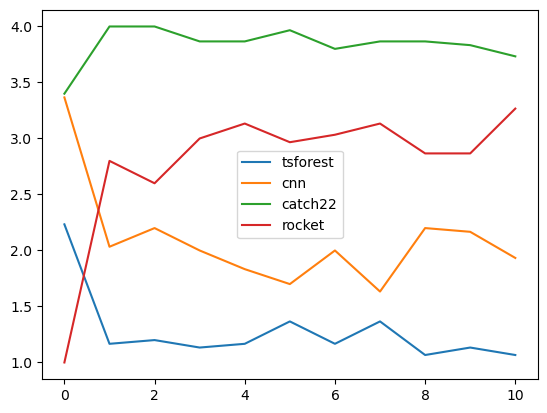

In [12]:
sub = df_ranks.query('dataset=="Car"')
for method in sub['method'].unique():
    print(method)
    h = sub.query(f'method=="{method}"').sort_values('level')
    plt.plot(h['level'], h['rank'], label=method)
plt.legend()

tsforest
cnn
catch22
rocket


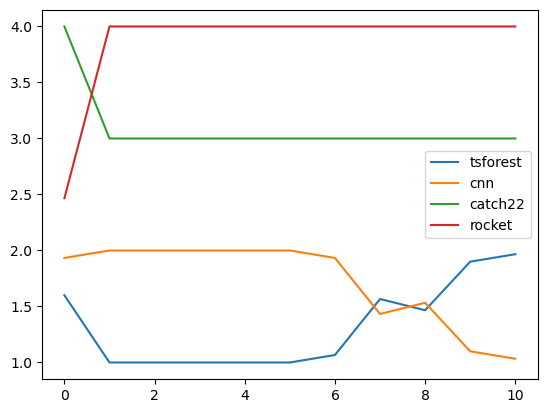

In [13]:
sub = df_ranks.query('dataset=="ChlorineConcentration"')
for method in sub['method'].unique():
    print(method)
    h = sub.query(f'method=="{method}"').sort_values('level')
    plt.plot(h['level'], h['rank'], label=method)
plt.legend()

/tmp/ipykernel_461212/1457549488.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub = df_ranks.groupby(['method', 'transform']).mean().reset_index()


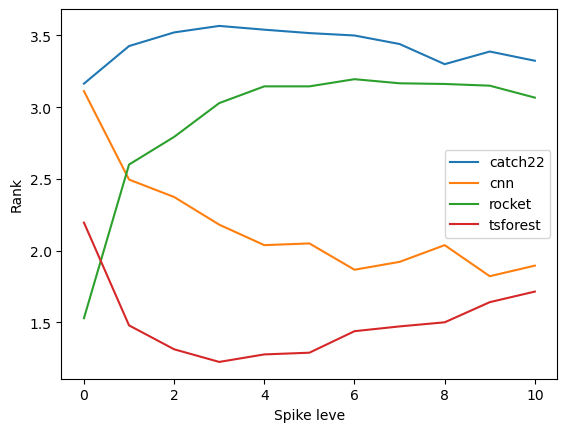

In [14]:
sub = df_ranks.groupby(['method', 'transform']).mean().reset_index()
for method in sub['method'].unique():
    h = sub.query(f'method=="{method}"').sort_values('level')
    plt.plot(h['level'], h['rank'], label=method)
plt.legend()
plt.xlabel('Spike leve')
plt.ylabel('Rank')
plt.savefig(f'figures/spike_rank.pdf', bbox_inches='tight', pad_inches=0)